# 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data 
data = pd.read_csv("imdb_top_1000.csv")

In [3]:
# display the first 3 rows
data.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


## Dropping irrelevant columns

In [4]:
# Drop irrelevant columns
data = data.drop(columns = ['Poster_Link', 'Overview'])
data.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


## Handling duplicates

In [5]:
# Check for duplicates
data.duplicated().sum()

0

## Handling nulls

In [6]:
# Check for null values
data.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## Handling data Types

In [7]:
# check the data types
data.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [8]:
# Converting Gross column to float
data['Gross'] = data['Gross'].str.replace(',', '').astype('float')

In [9]:
# Converting Runtime column to int
data['Runtime'] = data['Runtime'].str.replace('min', '').astype('int')

In [10]:
# Check distinct Release_Year
data['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [11]:
# Remove the row with PG as year
data = data[data['Released_Year'] != 'PG']

In [12]:
# Convert Release_Year from object
data['Released_Year'] = pd.to_datetime(data['Released_Year']).dt.year

In [13]:
# Confirming the data types
data.dtypes

Series_Title      object
Released_Year      int32
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

## Addressing Inconsistent data

In [14]:
# Removing white spaces in column Genre
data["Genre"] = data["Genre"].str.strip()

In [15]:
# Removing white spaces in column Series_Title
data["Series_Title"] = data["Series_Title"].str.strip()

## Saving the csv file

In [16]:
data.to_csv("imdb_top_1000_clean.csv", index = False)

# 2. Exploratory Data Analysis

## Summary statistics

In [17]:
# Check summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Released_Year,999.0,1.991217e+03,2.329702e+01,1920.0,1976.0,1999.0,2009.00,2020.0
Runtime,999.0,1.228739e+02,2.810252e+01,45.0,103.0,119.0,137.00,321.0
IMDB_Rating,999.0,7.949650e+00,2.754071e-01,7.6,7.7,7.9,8.10,9.3
Meta_score,842.0,7.797268e+01,1.238341e+01,28.0,70.0,79.0,87.00,100.0
No_of_Votes,999.0,2.736974e+05,3.275366e+05,25088.0,55471.5,138356.0,374477.50,2343110.0
Gross,830.0,6.790728e+07,1.097546e+08,1305.0,3245338.5,23457439.5,80103240.75,936662225.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int32  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int32  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Meta_score     842 non-null    float64
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          830 non-null    float64
dtypes: float64(3), int32(2), int64(1), object(8)
memory usage: 109.3+ KB


In [19]:
data.shape

(999, 14)

## Genre Analysis

### a. Movies Per Genres

In [20]:
# check the unique genres

# Split the genre column into a list of genres
split_genres = data['Genre'].str.split(',')

# Flatten the list of list into a single list of genres
all_genres = [genre.strip() for sublist in split_genres for genre in sublist]

# Get unique genres
unique_genres = set(all_genres)

# Convert the set back into a list
unique_genres = list(unique_genres)
print(unique_genres)

['Biography', 'Western', 'Comedy', 'Animation', 'Music', 'Sport', 'Drama', 'Thriller', 'Musical', 'Mystery', 'Crime', 'Film-Noir', 'Sci-Fi', 'History', 'Fantasy', 'Family', 'Romance', 'Adventure', 'War', 'Action', 'Horror']


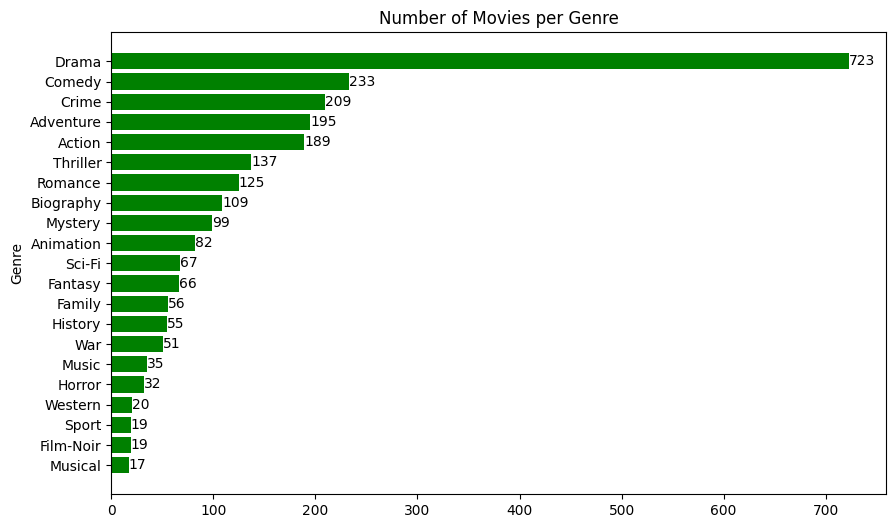

In [21]:
# Movie count per genre
genre_counts = pd.Series(all_genres).value_counts().sort_values(ascending = True)

# Visualize
plt.figure(figsize=(10,6))
bars = plt.barh(width=genre_counts.values,y=genre_counts.index, color = "green")
for bar in bars:
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(xval + 0.01, yval, round(xval, 2), ha='left', va='center')
plt.title("Number of Movies per Genre")
plt.ylabel("Genre")
plt.show()

### b. Ratings by Genre

In [22]:
# Duplicate data and save it in data2
data2 = data

In [23]:
# Split genre into separate rows
data2["Genre"] = data2["Genre"].str.split(',')
data2 = data2.explode("Genre")

In [24]:
# Removing the white spaces on column Genre
data2["Genre"] = data2["Genre"].str.strip()

In [25]:
# Group by genre and calculate the mean rating
genre_rating = data2.groupby("Genre").mean(numeric_only = True)['IMDB_Rating'].sort_values(ascending = False)
genre_rating

Genre
War          8.013725
Western      8.000000
Film-Noir    7.989474
Sci-Fi       7.977612
Mystery      7.967677
History      7.960000
Drama        7.959889
Crime        7.954545
Adventure    7.953846
Action       7.948677
Musical      7.947059
Biography    7.935780
Fantasy      7.931818
Animation    7.930488
Sport        7.926316
Romance      7.925600
Music        7.914286
Family       7.912500
Thriller     7.909489
Comedy       7.903433
Horror       7.887500
Name: IMDB_Rating, dtype: float64

### c. No of Votes by Genre

In [26]:
genre_votes = data2.groupby("Genre").mean(numeric_only = True)['No_of_Votes'].round().sort_values(ascending = False)

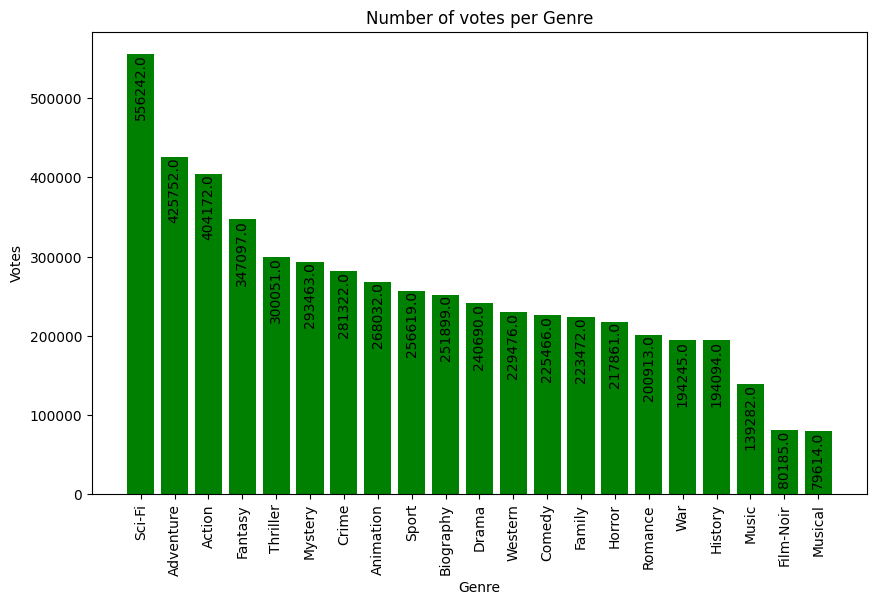

In [27]:
# Visualize
plt.figure(figsize=(10,6))
bars = plt.bar(x=genre_votes.index, height=genre_votes.values, color = "green")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='top', rotation = 90)
plt.title("Number of votes per Genre")
plt.ylabel("Votes")
plt.xlabel("Genre")
plt.xticks(rotation = 90)
plt.show()

### By Gross

In [28]:
# Top 10 Genres by Gross
genre_gross = data2.groupby('Genre').sum()["Gross"].sort_values(ascending = False).head(10)

# Convert the series into a dataframe
genre_gross_df = genre_gross.reset_index()

# Format the gross column to be readable
genre_gross_df["Gross"] = genre_gross_df["Gross"].apply(lambda x: f"{x:,.2f}")

# Display the df
genre_gross_df

,Genre,Gross
0,Adventure,"28,000,479,436.00"
1,Drama,"27,323,784,696.00"
2,Action,"22,033,328,131.00"
3,Comedy,"12,247,931,579.00"
4,Sci-Fi,"9,029,610,220.00"
5,Animation,"8,573,824,407.00"
6,Crime,"6,956,303,927.00"
7,Thriller,"6,454,428,931.00"
8,Fantasy,"6,082,543,147.00"
9,Biography,"5,304,577,796.00"


## Saving data2 as csv file

In [29]:
data2.to_csv("imdb_data_clean.csv")

##  Director Analysis

### a. By movies

In [30]:
# Top 10 directors by number of movies
director_count = data.groupby("Director").count()["Series_Title"].sort_values(ascending = False).head(10)

# Convert the Series to a df
director_count_df = director_count.reset_index()

# Displaay the data frame
director_count_df

,Director,Series_Title
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10
5,Stanley Kubrick,9
6,Woody Allen,9
7,Billy Wilder,9
8,Quentin Tarantino,8
9,Christopher Nolan,8


### b. By Gross

In [31]:
# Top 10 directors by mean Gross
director_count = data.groupby("Director").mean(numeric_only = True)["Gross"].sort_values(ascending = False).head(10)

# Convert the series to a df for better readability
director_count_df = director_count.reset_index()

# Format the gross column to read the numbers in a more readable format
director_count_df["Gross"] = director_count_df["Gross"].apply(lambda x: f"{x:,.2f}")

# Display the top 20 directors with their mean Gross
director_count_df

,Director,Gross
0,Anthony Russo,"551,259,850.75"
1,Gareth Edwards,"532,177,324.00"
2,J.J. Abrams,"474,390,301.67"
3,Josh Cooley,"434,038,008.00"
4,Roger Allers,"422,783,777.00"
5,Tim Miller,"363,070,709.00"
6,James Gunn,"361,494,850.50"
7,James Cameron,"349,647,320.40"
8,Byron Howard,"341,268,248.00"
9,David Yates,"326,317,907.00"


### c. By Rating

In [32]:
# Top 10 directors by rating
director_rating = data.groupby("Director").mean(numeric_only =  True)["IMDB_Rating"].sort_values(ascending = False).head(10)

# Convert the series to a df
director_rating_df = director_rating.reset_index()

# Display the data frame
director_rating_df

,Director,IMDB_Rating
0,Frank Darabont,8.95
1,Irvin Kershner,8.70
2,Lana Wachowski,8.70
3,George Lucas,8.60
4,Roberto Benigni,8.60
5,Masaki Kobayashi,8.60
6,Thomas Kail,8.60
7,Sudha Kongara,8.60
8,Fernando Meirelles,8.60
9,Roger Allers,8.50


### d. By Meta_score

In [33]:
# Top 10 directors by meta_score
director_score = data.groupby("Director").mean(numeric_only =  True)["Meta_score"].sort_values(ascending = False).head(10)

# Convert the series to a df
director_score_df = director_score.reset_index()

# Display the data frame
director_score_df

,Director,Meta_score
0,Orson Welles,99.5
1,Charles Laughton,99.0
2,Michael Curtiz,98.5
3,Joseph L. Mankiewicz,98.0
4,Guillermo del Toro,98.0
5,Fritz Lang,98.0
6,Cristian Mungiu,97.0
7,Sergei M. Eisenstein,97.0
8,Sam Peckinpah,97.0
9,Jules Dassin,97.0


### e. By Runtime

In [34]:
# Top 10 directors by Runtime
director_time = data.groupby("Director").mean(numeric_only =  True)["Runtime"].sort_values(ascending = False).head(10)

# Convert the series to a df
director_time_df = director_time.reset_index()

# Display the data frame
director_time_df

,Director,Runtime
0,Kenneth Branagh,242.0
1,Anurag Kashyap,232.5
2,Cecil B. DeMille,220.0
3,Ashutosh Gowariker,217.0
4,Ramesh Sippy,204.0
5,George Stevens,201.0
6,Philip Kaufman,193.0
7,Yash Chopra,192.0
8,Richard Attenborough,191.0
9,Aditya Chopra,189.0


## Star Analysis

In [35]:
# Melt the data frame to combine star column into a single column
data_melted = pd.melt(data, id_vars = ['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating', 'Meta_score', 'Director', 'No_of_Votes',
                                   'Gross'], value_vars = ['Star1', 'Star2', 'Star3', 'Star4'],var_name = 'original_position',value_name = 'Star')

In [46]:
# Display first 5 rows
data_melted.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,original_position,Star
0,The Shawshank Redemption,1994,142,[Drama],9.3,80.0,Frank Darabont,2343110,28341469.0,Star1,Tim Robbins
1,The Godfather,1972,175,"[Crime, Drama]",9.2,100.0,Francis Ford Coppola,1620367,134966411.0,Star1,Marlon Brando
2,The Dark Knight,2008,152,"[Action, Crime, Drama]",9.0,84.0,Christopher Nolan,2303232,534858444.0,Star1,Christian Bale
3,The Godfather: Part II,1974,202,"[Crime, Drama]",9.0,90.0,Francis Ford Coppola,1129952,57300000.0,Star1,Al Pacino
4,12 Angry Men,1957,96,"[Crime, Drama]",9.0,96.0,Sidney Lumet,689845,4360000.0,Star1,Henry Fonda


### a. By Gross

In [47]:
# Top 10 stars by Gross
star_gross = data_melted.groupby('Star').mean(numeric_only = True)["Gross"].sort_values(ascending = False).head(10)

# Convert the series into a dataframe
star_gross_df = star_gross.reset_index()

# Format the gross column to be readable
star_gross_df["Gross"] = star_gross_df["Gross"].apply(lambda x: f"{x:,.2f}")

# Display the df
star_gross_df

,Star,Gross
0,Daisy Ridley,"936,662,225.00"
1,John Boyega,"936,662,225.00"
2,Michelle Rodriguez,"760,507,625.00"
3,Billy Zane,"659,325,379.00"
4,Huck Milner,"608,581,744.00"
5,Sarah Vowell,"608,581,744.00"
6,Joe Russo,"551,259,850.75"
7,Aaron Eckhart,"534,858,444.00"
8,Donnie Yen,"532,177,324.00"
9,Diego Luna,"532,177,324.00"


In [ ]:
# Visualize
plt.figure(figsize=(10,6))
bars = plt.bar(x=star_gross.index, height=star_gross.values, color = "green")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='top', rotation = 90)
plt.title("Number of votes per Genre")
plt.ylabel("Gross")
plt.xlabel("Stars")
plt.xticks(rotation = 90)
plt.show()

### b. By Rating

In [ ]:
# Top 10 stars by IMDB_Rating
star_rating = data_melted.groupby('Star').mean(numeric_only = True)["IMDB_Rating"].sort_values(ascending = False).head(10)

# Convert the series into a dataframe
star_rating_df = star_rating.reset_index()

# Display the df
star_rating_df

### c. Combination of stars(Gross, IMBD_Rating)

In [ ]:
# Create a duplicate dataframe
data3 = data

In [ ]:
# Create a column for the group of stars
data3['Stars'] = data3[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda x: ','.join(sorted(x.dropna())), axis = 1)
data3.head(3)

### By Grosss

In [ ]:
# Group by Stars
stars_gross = data3.groupby('Stars').mean(numeric_only = True)['Gross'].sort_values(ascending = False).head(10)

# Convert to a df
stars_gross_df = stars_gross.reset_index()

# Set the display option for max_colwidth to None
pd.set_option('display.max_colwidth', None)

# Display the df
stars_gross_df

### By IMDB Rating

In [ ]:
# Group by Stars
stars_rating = data3.groupby('Stars').mean(numeric_only = True)['IMDB_Rating'].sort_values(ascending = False).head(10)

# Convert to a df
stars_rating_df = stars_rating.reset_index()

# Set the display option for max_colwidth to None
pd.set_option('display.max_colwidth', None)

# Display the df
stars_rating_df

## Certificate Analysis

In [ ]:
# Display unique certifocate
data["Certificate"].unique()

### a. By Gross

In [56]:
# Group by Certificate
certificate_gross = data.groupby("Certificate").mean(numeric_only = True)['Gross'].sort_values(ascending = True)

# Convert the series to a df
certificate_gross_df = certificate_gross.reset_index()

# Drop nulls
certificate_gross_df = certificate_gross_df.dropna()

# Format the Gross column for readability
certificate_gross_df["Gross"] = certificate_gross_df["Gross"].apply(lambda x: f"{x: ,.2f}")

# Display the df
certificate_gross_df

,Certificate,Gross
0,TV-PG,"106,662.00"
1,Unrated,"300,000.00"
2,GP,"708,958.00"
3,Passed,"5,435,553.74"
4,Approved,"6,949,014.00"
5,PG,"17,888,273.29"
6,R,"25,793,599.39"
7,U/A,"26,020,957.00"
8,PG-13,"36,947,857.08"
9,G,"49,596,325.70"


### b. By IMDB Rating

In [61]:
# Group by Certificate
certificate_rating = data.groupby("Certificate").mean(numeric_only = True)["IMDB_Rating"].sort_values(ascending = False)

# Convert the Series to a df
certificate_rating_df = certificate_rating.reset_index()

# Display the df
certificate_rating_df

,Certificate,IMDB_Rating
0,TV-14,8.300000
1,16,8.100000
2,TV-MA,8.100000
3,Unrated,8.100000
4,Passed,8.020588
5,G,8.000000
6,A,7.998985
7,U,7.978541
8,UA,7.957143
9,Approved,7.945455


### c. By No_of_Votes

In [64]:
# Group by Certificate
certificate_rating = data.groupby("Certificate").mean(numeric_only = True)["No_of_Votes"].round().sort_values(ascending = False)

# Convert the Series to a df
certificate_rating_df = certificate_rating.reset_index()

# Format the No of votes to be readable
certificate_rating_df["No_of_Votes"] = certificate_rating_df["No_of_Votes"].apply(lambda x: f"{x :,}")

# Display the df
certificate_rating_df

,Certificate,No_of_Votes
0,UA,"439,033.0"
1,A,"428,215.0"
2,U,"256,050.0"
3,R,"212,992.0"
4,PG-13,"144,102.0"
5,TV-MA,"141,516.0"
6,U/A,"140,840.0"
7,G,"134,312.0"
8,PG,"101,581.0"
9,Passed,"73,523.0"


### d. By Meta_score

In [66]:
# Group by Certificate
certificate_score = data.groupby("Certificate").mean(numeric_only = True)["Meta_score"].sort_values(ascending = False)

# Convert the Series to a df
certificate_score_df = certificate_score.reset_index()

# Drop the null values
certificate_score_df = certificate_score_df.dropna()

# Display the df
certificate_score_df

,Certificate,Meta_score
0,Approved,88.000000
1,Passed,87.277778
2,TV-PG,86.666667
3,G,86.100000
4,PG,82.966667
5,U,78.721393
6,16,78.000000
7,A,77.951872
8,PG-13,76.095238
9,UA,75.206897


### e. By Runtime

In [67]:
# Group by Certificate
certificate_runtime = data.groupby("Certificate").mean(numeric_only = True)["Runtime"].sort_values(ascending = False)

# Convert the Series to a df
certificate_runtime_df = certificate_runtime.reset_index()

# Drop the null values
certificate_runtime_df = certificate_runtime_df.dropna()

# Display the df
certificate_runtime_df

,Certificate,Runtime
0,Unrated,183.000000
1,TV-14,132.000000
2,16,130.000000
3,UA,129.331429
4,A,128.939086
5,GP,124.500000
6,U,124.090129
7,R,122.369863
8,G,119.666667
9,PG-13,116.953488


## Time Analysis

### a. Series Release Trend

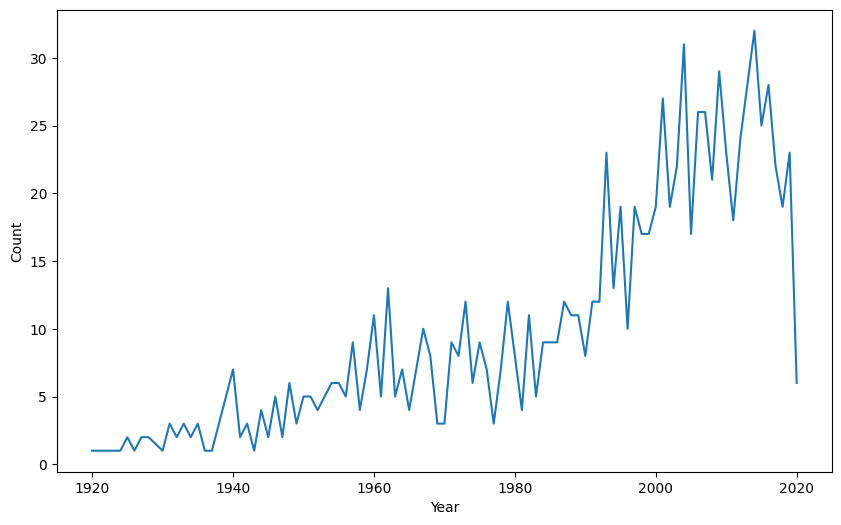

In [87]:
# Create a new figure for plotting
plt.figure(figsize = (10,6))

# Get the count of movies for each year
released_year = data.groupby("Released_Year").count()["Series_Title"]

# Create x and y and plot
x = released_year.index
y = released_year.values
plt.plot(x, y)

# Add labels
plt.xlabel("Year")
plt.ylabel("Count")

# Display the plot
plt.show()

### b. Avg Gross Trend

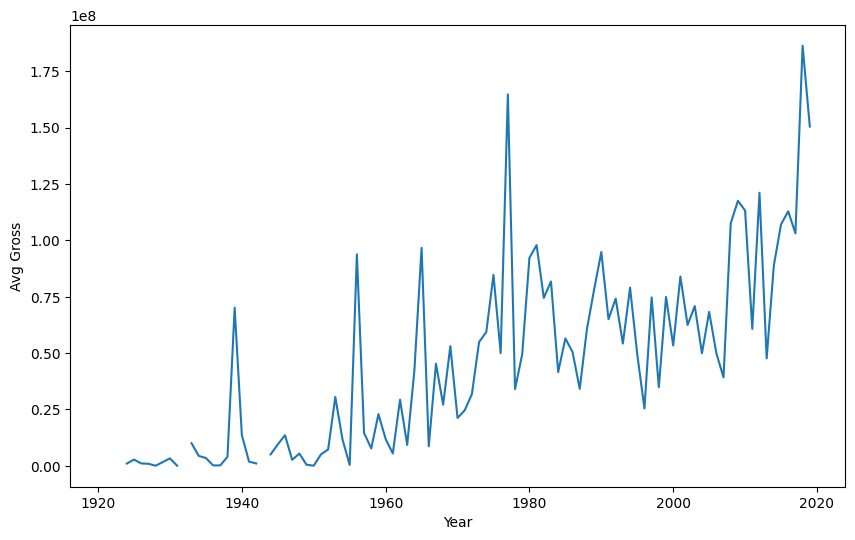

In [17]:
# Create a new figure for plotting
plt.figure(figsize = (10,6))

# Get the avg gross for each year
gross_year = data.groupby("Released_Year").mean(numeric_only = True)["Gross"]

# Create x and y and plot
x = gross_year.index
y = gross_year.values
plt.plot(x, y)

# Add labels
plt.xlabel("Year")
plt.ylabel("Avg Gross")

# Display the plot
plt.show()

### c. Rating trend

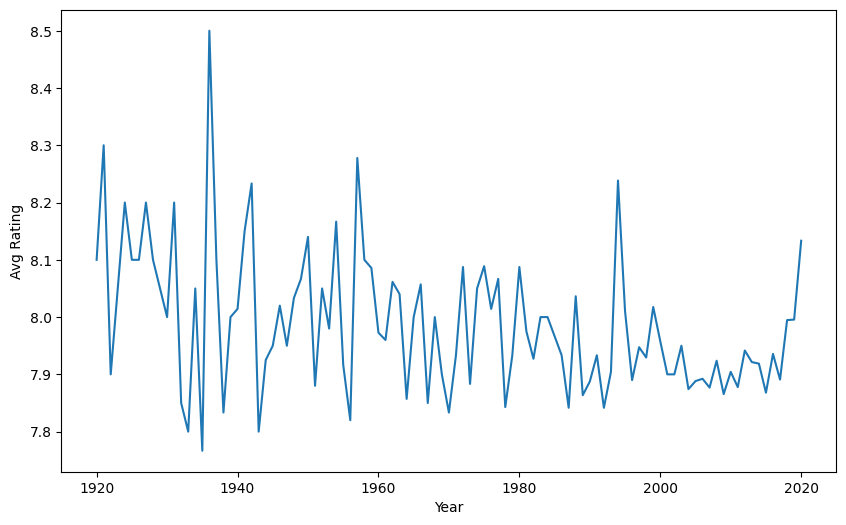

In [18]:
# Create a new figure for plotting
plt.figure(figsize = (10,6))

# Get the avg rating for each year
rating_year = data.groupby("Released_Year").mean(numeric_only = True)["IMDB_Rating"]

# Create x and y and plot
x = rating_year.index
y = rating_year.values
plt.plot(x, y)

# Add labels
plt.xlabel("Year")
plt.ylabel("Avg Rating")

# Display the plot
plt.show()

### d.Meta score trend

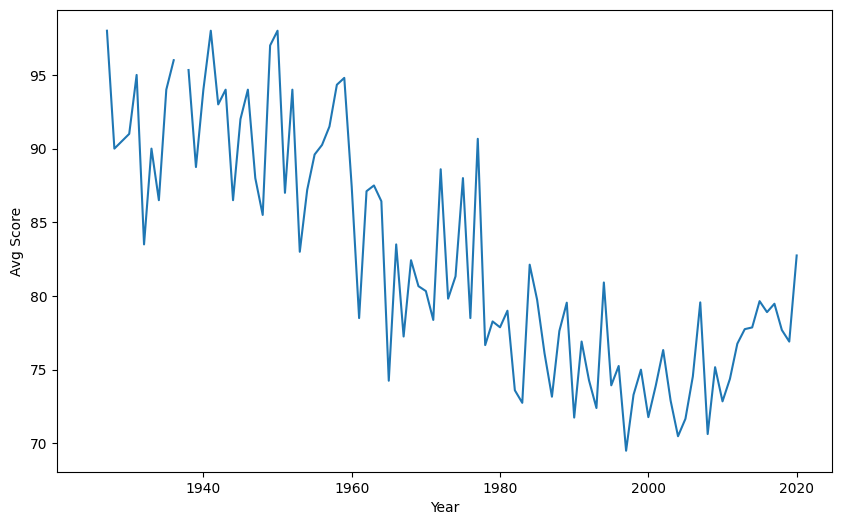

In [20]:
# Create a new figure for plotting
plt.figure(figsize = (10,6))

# Get the avg Meta_score for each year
score_year = data.groupby("Released_Year").mean(numeric_only = True)["Meta_score"]

# Create x and y and plot
x = score_year.index
y = score_year.values
plt.plot(x, y)

# Add labels
plt.xlabel("Year")
plt.ylabel("Avg Score")

# Display the plot
plt.show()

### e. No of Votes Trend

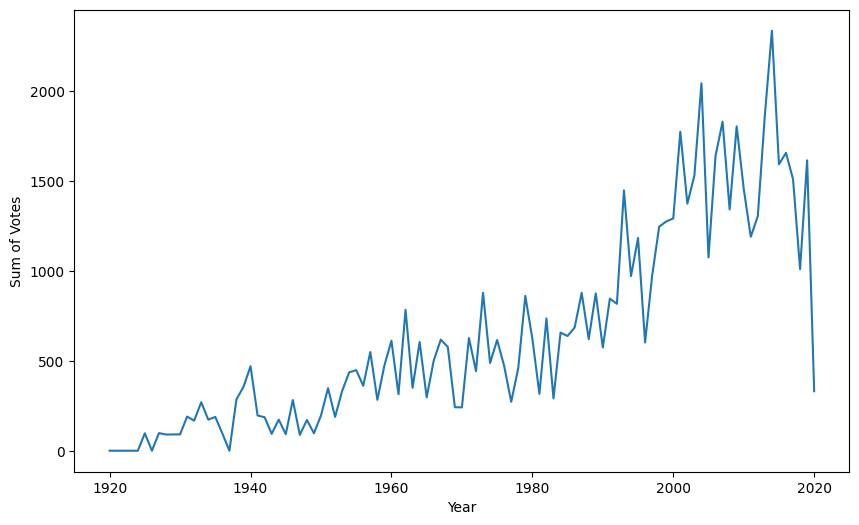

In [21]:
# Create a new figure for plotting
plt.figure(figsize = (10,6))

# Get the sum of votes for each year
votes_year = data.groupby("Released_Year").sum()["Meta_score"]

# Create x and y and plot
x = votes_year.index
y = votes_year.values
plt.plot(x, y)

# Add labels
plt.xlabel("Year")
plt.ylabel("Sum of Votes")

# Display the plot
plt.show()

## More Analysis

### a. Correlation matrix

In [70]:
# Include only numeric data
numeric_data = data.select_dtypes(include = ['float', 'int'])

# Create  a correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix
corr_matrix

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,0.165807,-0.131053,-0.339272,0.241785,0.233250
Runtime,0.165807,1.000000,0.244112,-0.031399,0.173304,0.139104
IMDB_Rating,-0.131053,0.244112,1.000000,0.268641,0.495361,0.097490
Meta_score,-0.339272,-0.031399,0.268641,1.000000,-0.018519,-0.030560
No_of_Votes,0.241785,0.173304,0.495361,-0.018519,1.000000,0.574877
Gross,0.233250,0.139104,0.097490,-0.030560,0.574877,1.000000


### b. Heat map

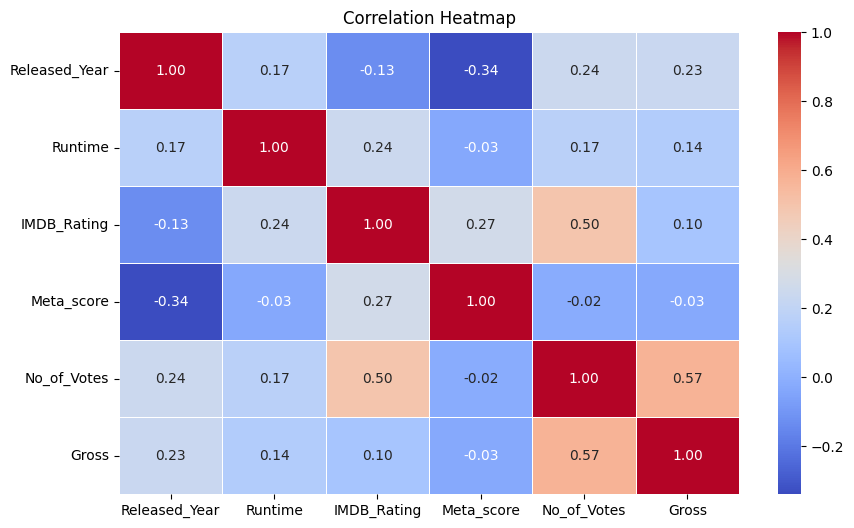

In [72]:
# Create a new figure with size 10*6 inches
plt.figure(figsize = (10,6))
# Plot the correlation heat map
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
# Add a title
plt.title('Correlation Heatmap')
# Plot the heat map
plt.show()